- Data Understanding & Cleaning
- EDA
- Derived Metrics
- Dimensionality Reduction using PCA
- Classification models to predict Churn (Use various Models & Handle class imbalance)
- Model Evaluation
- Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)
- Summarize

In [4]:
# Importing the required Librarires

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

### Train Data set

In [5]:
df = pd.read_csv('Desktop/Python Data Structure/train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Test Data Set

In [6]:
df_test = pd.read_csv("Desktop/Python Data Structure/test.csv")
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


## Data Understanding & cleaning

In [7]:
df.shape

(69999, 172)

In [8]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
# Finding Unique Values in Columns

uniq1= []
for col in df.columns:
    if df[col].nunique() == 1:
        print(col, df[col].nunique())
        uniq1.append(col)

circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_8 1
std_ic_t2o_mou_6 1
std_ic_t2o_mou_7 1
std_ic_t2o_mou_8 1


### Dropping Columns having unique value in Train & Test Data

In [11]:
df.drop(columns = uniq1, axis = 1, inplace = True)

In [12]:
df_test.drop(columns = uniq1, axis = 1, inplace = True)

### Null check on columns of Training data

In [13]:
null_col = []
for col in df.columns:
    if(df[col].isnull().any()):
        print(col,":", round(df[col].isnull().sum()/ len(df), 3))
        null_col.append(col)

onnet_mou_6 : 0.04
onnet_mou_7 : 0.038
onnet_mou_8 : 0.053
offnet_mou_6 : 0.04
offnet_mou_7 : 0.038
offnet_mou_8 : 0.053
roam_ic_mou_6 : 0.04
roam_ic_mou_7 : 0.038
roam_ic_mou_8 : 0.053
roam_og_mou_6 : 0.04
roam_og_mou_7 : 0.038
roam_og_mou_8 : 0.053
loc_og_t2t_mou_6 : 0.04
loc_og_t2t_mou_7 : 0.038
loc_og_t2t_mou_8 : 0.053
loc_og_t2m_mou_6 : 0.04
loc_og_t2m_mou_7 : 0.038
loc_og_t2m_mou_8 : 0.053
loc_og_t2f_mou_6 : 0.04
loc_og_t2f_mou_7 : 0.038
loc_og_t2f_mou_8 : 0.053
loc_og_t2c_mou_6 : 0.04
loc_og_t2c_mou_7 : 0.038
loc_og_t2c_mou_8 : 0.053
loc_og_mou_6 : 0.04
loc_og_mou_7 : 0.038
loc_og_mou_8 : 0.053
std_og_t2t_mou_6 : 0.04
std_og_t2t_mou_7 : 0.038
std_og_t2t_mou_8 : 0.053
std_og_t2m_mou_6 : 0.04
std_og_t2m_mou_7 : 0.038
std_og_t2m_mou_8 : 0.053
std_og_t2f_mou_6 : 0.04
std_og_t2f_mou_7 : 0.038
std_og_t2f_mou_8 : 0.053
std_og_mou_6 : 0.04
std_og_mou_7 : 0.038
std_og_mou_8 : 0.053
isd_og_mou_6 : 0.04
isd_og_mou_7 : 0.038
isd_og_mou_8 : 0.053
spl_og_mou_6 : 0.04
spl_og_mou_7 : 0.038
spl_

### Null check on Test data

In [14]:
# Counting No of Null values in Column

null_col_test = []
for col in df_test.columns:
    if(df_test[col].isnull().any()):
        print(col,":", round(df_test[col].isnull().sum()/ len(df_test), 3))
        null_col_test.append(col)

onnet_mou_6 : 0.039
onnet_mou_7 : 0.039
onnet_mou_8 : 0.056
offnet_mou_6 : 0.039
offnet_mou_7 : 0.039
offnet_mou_8 : 0.056
roam_ic_mou_6 : 0.039
roam_ic_mou_7 : 0.039
roam_ic_mou_8 : 0.056
roam_og_mou_6 : 0.039
roam_og_mou_7 : 0.039
roam_og_mou_8 : 0.056
loc_og_t2t_mou_6 : 0.039
loc_og_t2t_mou_7 : 0.039
loc_og_t2t_mou_8 : 0.056
loc_og_t2m_mou_6 : 0.039
loc_og_t2m_mou_7 : 0.039
loc_og_t2m_mou_8 : 0.056
loc_og_t2f_mou_6 : 0.039
loc_og_t2f_mou_7 : 0.039
loc_og_t2f_mou_8 : 0.056
loc_og_t2c_mou_6 : 0.039
loc_og_t2c_mou_7 : 0.039
loc_og_t2c_mou_8 : 0.056
loc_og_mou_6 : 0.039
loc_og_mou_7 : 0.039
loc_og_mou_8 : 0.056
std_og_t2t_mou_6 : 0.039
std_og_t2t_mou_7 : 0.039
std_og_t2t_mou_8 : 0.056
std_og_t2m_mou_6 : 0.039
std_og_t2m_mou_7 : 0.039
std_og_t2m_mou_8 : 0.056
std_og_t2f_mou_6 : 0.039
std_og_t2f_mou_7 : 0.039
std_og_t2f_mou_8 : 0.056
std_og_mou_6 : 0.039
std_og_mou_7 : 0.039
std_og_mou_8 : 0.056
isd_og_mou_6 : 0.039
isd_og_mou_7 : 0.039
isd_og_mou_8 : 0.056
spl_og_mou_6 : 0.039
spl_og_mou

### Removing those Rows where more than 90 columns have null values.

In [15]:
# df = df[df.T.isnull().sum()<90]

### Imputing arpu columns having null values with median from training set

In [16]:
filter_df = df.filter(regex = 'arpu')

In [17]:
for col in filter_df.columns:
    df[col] = df[col].fillna(value = df[col].median())
    df_test[col] = df_test[col].fillna(value = df[col].median())

In [18]:
# imputing null value of Train with 0

df = df.fillna(value = 0, axis = 1)

In [19]:
# imputing null value of Test with 0

df_test = df_test.fillna(value = 0, axis = 1)

In [20]:
df.isnull().sum()

id                   0
arpu_6               0
arpu_7               0
arpu_8               0
onnet_mou_6          0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 159, dtype: int64

In [21]:
# Dropping ID column from both Train as well as Test Data

df.drop(columns = 'id', axis = 1, inplace = True)
df_test.drop(columns = 'id', axis = 1, inplace = True)

In [22]:
# Calculating Churn Probability

df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [23]:
# Finding Date Column with Object Type

datecol = []
for col in df.columns:
    if df[col].dtype == 'O':
        print(col)
        datecol.append(col)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [24]:
# Dropping Date Column from both Train & Test data

df.drop(columns = datecol, axis = 1, inplace = True)
df_test.drop(columns = datecol, axis = 1, inplace = True)

In [25]:
df.shape

(69999, 152)

In [26]:
df_test.shape

(30000, 151)

### Converting outliers form training and testing data according to the values in training data

In [27]:
df1 = df.copy()
for col in df1.columns:
    if col != 'churn_probability':
        percentiles = df1[col].quantile([0.01,0.99]).values
        df1[col][df1[col] <= percentiles[0]] = percentiles[0]
        df_test[col][df_test[col] <= percentiles[0]] = percentiles[0] 
        df1[col][df1[col] >= percentiles[1]] = percentiles[1]
        df_test[col][df_test[col] >= percentiles[1]] = percentiles[1]

In [28]:
df1.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,276.926861,271.901058,272.341811,120.747130,121.224215,118.333505,184.197691,182.341078,178.947790,7.202796,...,0.054929,0.055872,0.229975,0.232132,0.234246,1220.188946,60.651021,58.393407,52.577735,0.101887
std,268.478830,269.419465,273.950117,237.768446,243.753462,239.824631,263.554912,265.383818,261.521972,29.059940,...,0.281017,0.283716,0.420819,0.422196,0.423530,951.019424,200.381350,199.688297,185.097042,0.302502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000
25%,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000
50%,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.000000,0.000000
75%,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.000000,0.000000
max,1400.276640,1414.891380,1445.054800,1429.040400,1461.342200,1448.891000,1520.310000,1517.838600,1492.232400,213.827400,...,2.000000,2.000000,1.000000,1.000000,1.000000,3651.000000,1226.659800,1254.279000,1188.267800,1.000000


In [29]:
df1.shape

(69999, 152)

In [30]:
df_test.shape

(30000, 151)

### EDA

In [31]:
def plot1(col1, col2, col3, p1, p2, p3):
    plt.figure(figsize=(20, 18))
    if p1==1:
        plt.subplot(3,3,1)
        sns.barplot(x = 'churn_probability', y = col1, data = df1)
        plt.subplot(3,3,2)
        sns.barplot(x = 'churn_probability', y = col2, data = df1)
        plt.subplot(3,3,3)
        sns.barplot(x = 'churn_probability', y = col3, data = df1)
    if p2 ==1:
        plt.subplot(3,3,4)
        sns.boxplot(x = 'churn_probability', y = col1, data = df1)
        plt.subplot(3,3,5)
        sns.boxplot(x = 'churn_probability', y = col2, data = df1)
        plt.subplot(3,3,6)
        sns.boxplot(x = 'churn_probability', y = col3, data = df1)
    if p3 ==1:
        plt.subplot(3,3,7)
        sns.histplot(df1[df1['churn_probability'] == 0][col1], kde = True)
        sns.histplot(df1[df1['churn_probability'] == 1][col1], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,8)
        sns.histplot(df1[df1['churn_probability'] == 0][col2], kde = True)
        sns.histplot(df1[df1['churn_probability'] == 1][col2], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,9)
        sns.histplot(df1[df1['churn_probability'] == 0][col3], kde = True)
        sns.histplot(df1[df1['churn_probability'] == 1][col3], color = 'red', kde=True)
    plt.legend(['Not churn', 'churn'])

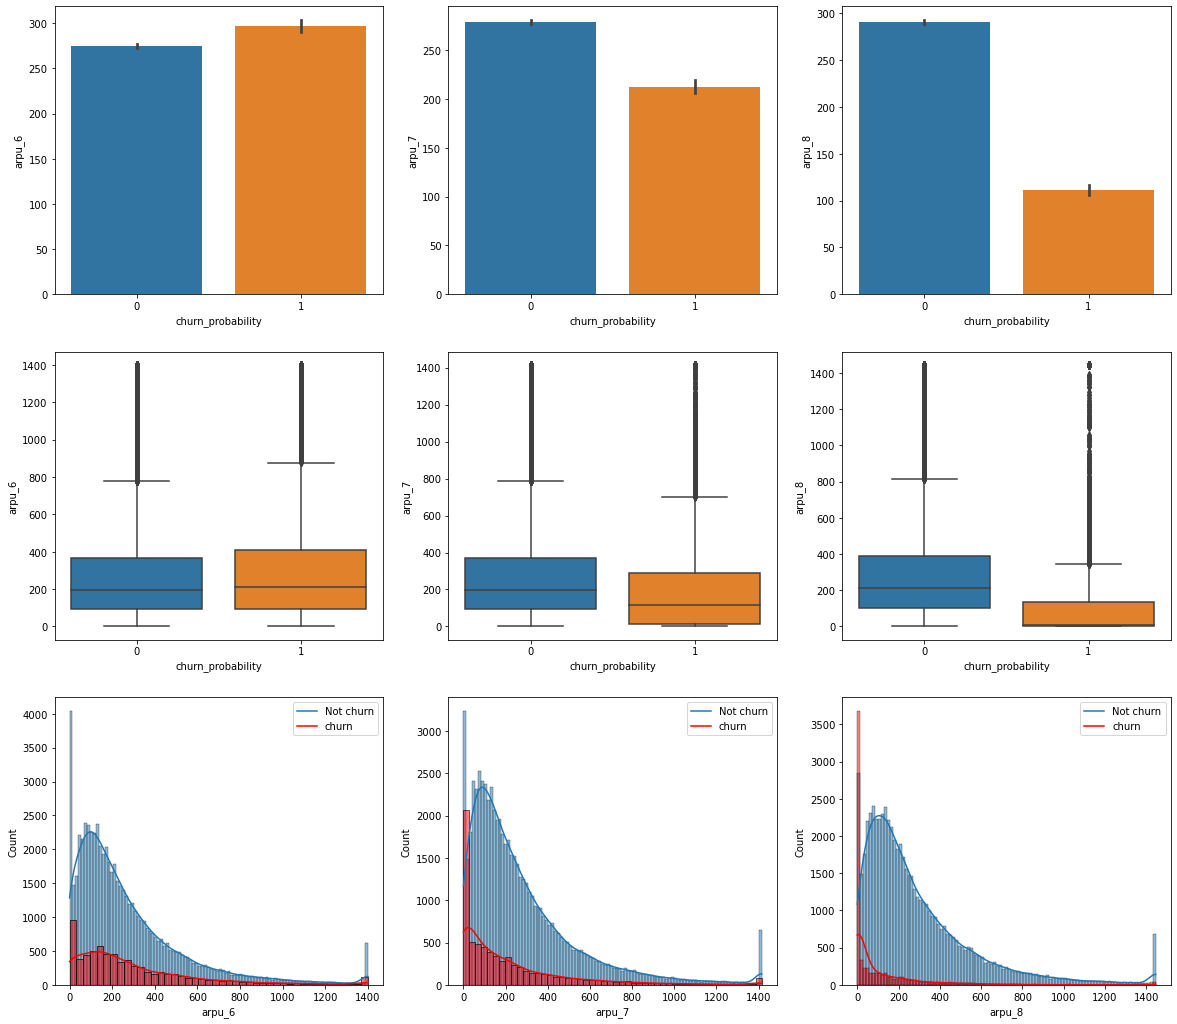

In [32]:
plot1('arpu_6', 'arpu_7', 'arpu_8', 1, 1, 1 )

Observations :-
- In Month of 6, average revenue per user is more from Churn Users than Non Churn.
- 50% revenue is equally in 7th Month.
- mobile_number is also unrelated with the problem, can be dropped.
- In the 6th, 7th and 8th month columns :-
  - Majority of the columns are right skewed.
  - There are a lot of outliers in more than 95 % columns

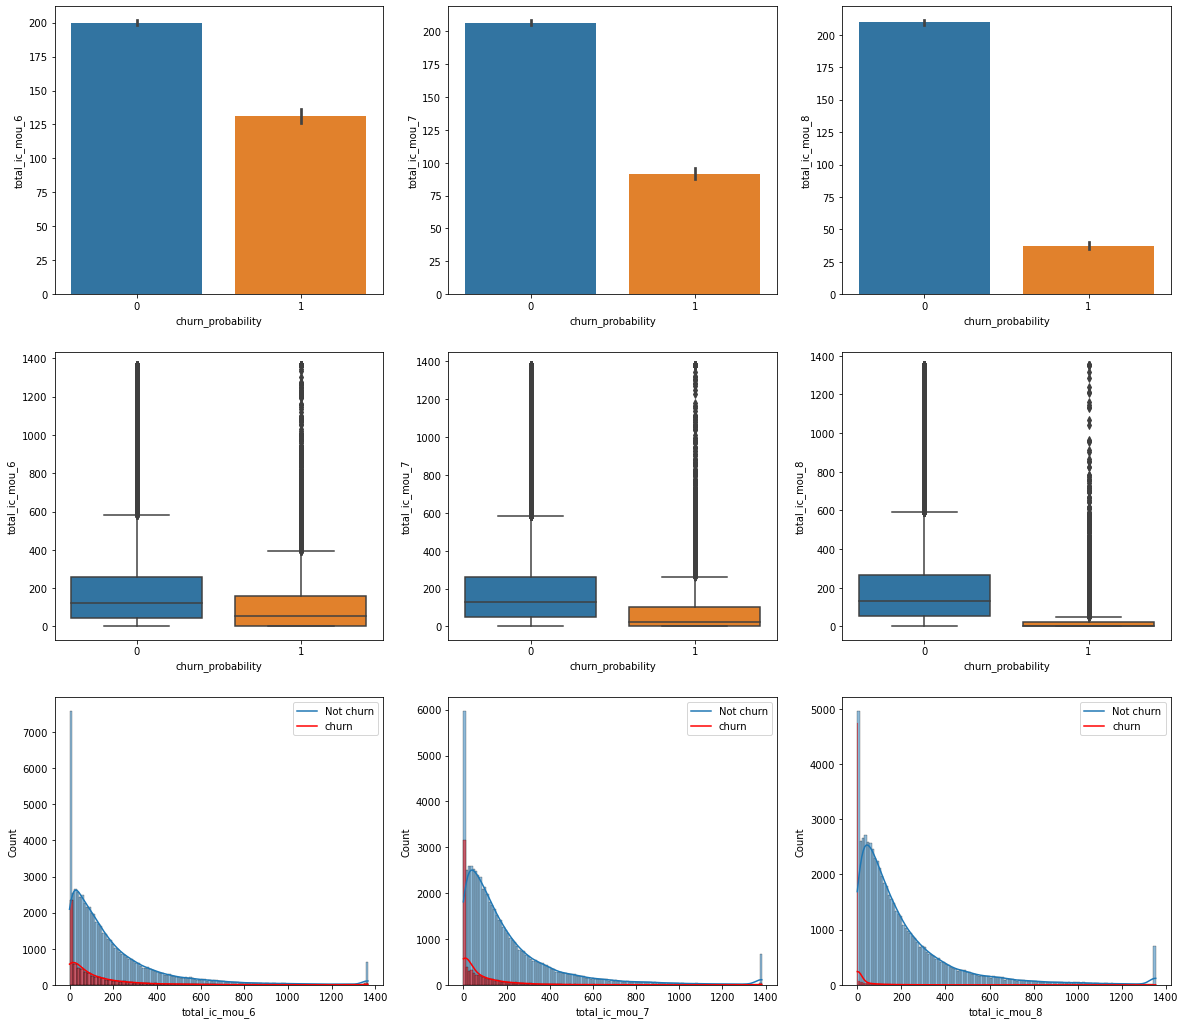

In [33]:
plot1('total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8' ,1,1,1)

Observations :-
- Incoming calls reduce of Churn Users from 6 th 8 month
- If the total incoming minutes of usage (total_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

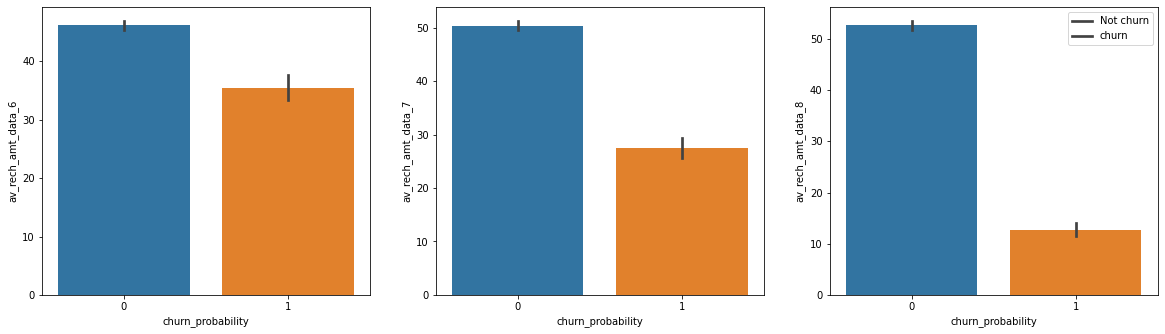

In [34]:
plot1('av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 1, 0, 0)

## Analysis

### As expected, the churn rate is more for the customers , whose average recharge is more.

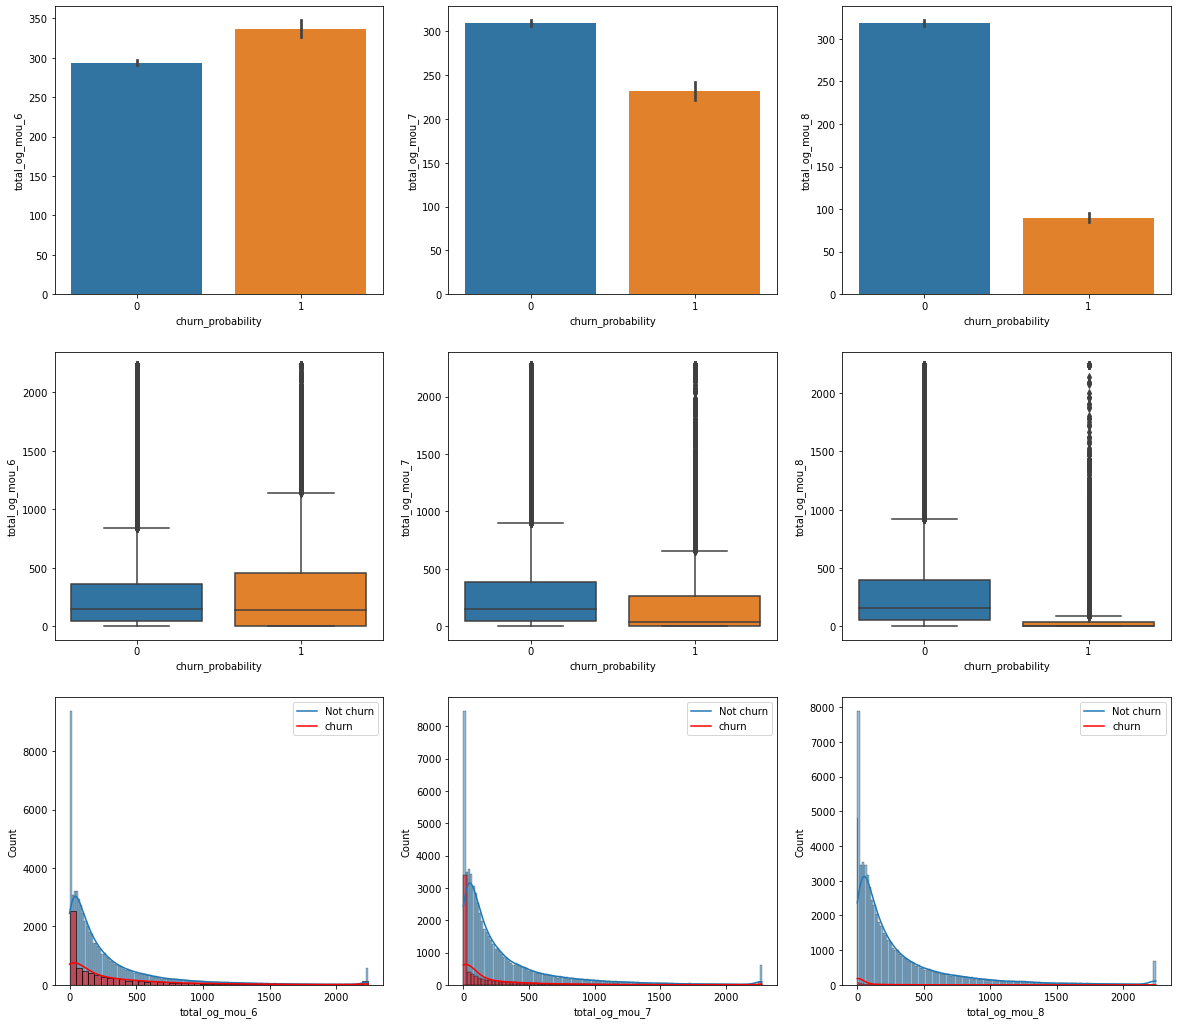

In [35]:
plot1('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 1, 1, 1)

### Analysis

### Outgoing calls of Churn users decreases from good phase(6th month) to action phase(8th Month)

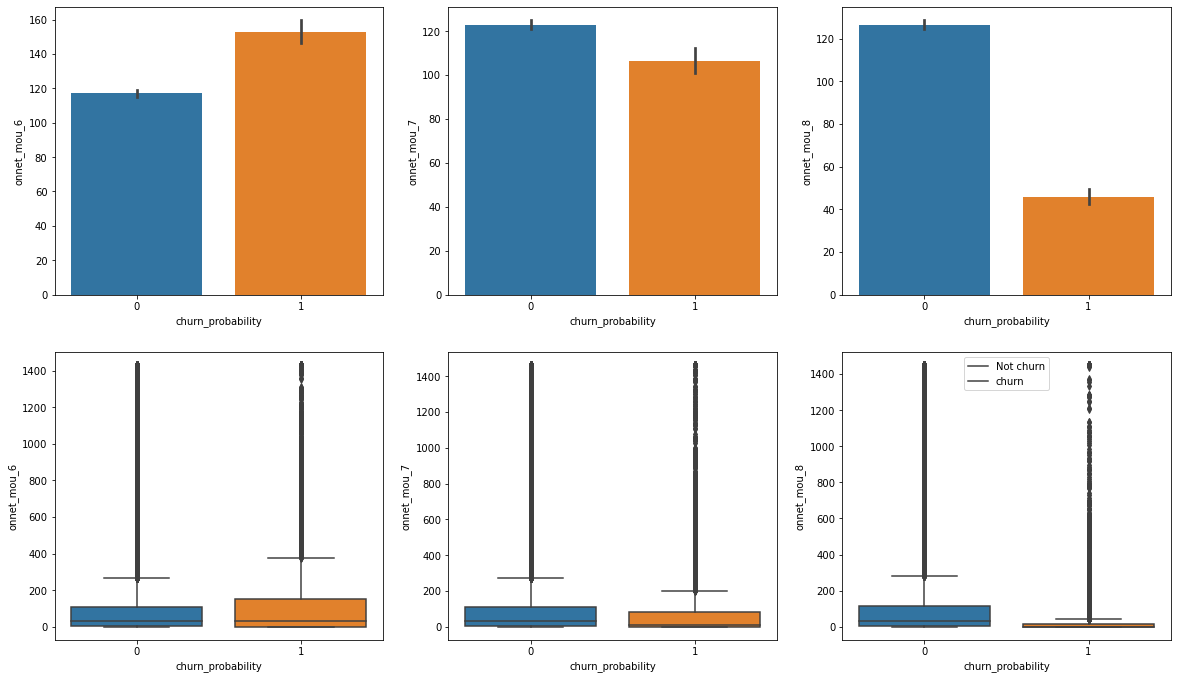

In [36]:
plot1('onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 1, 1,0)

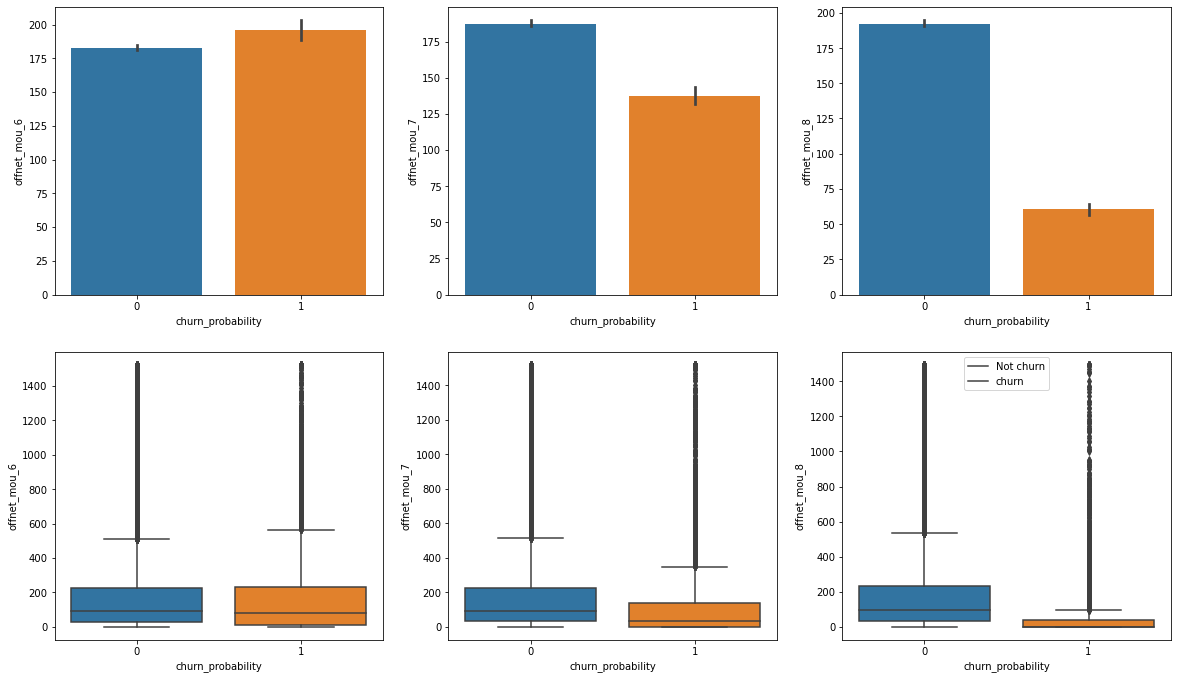

In [177]:
plot1('offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 1, 1,0)

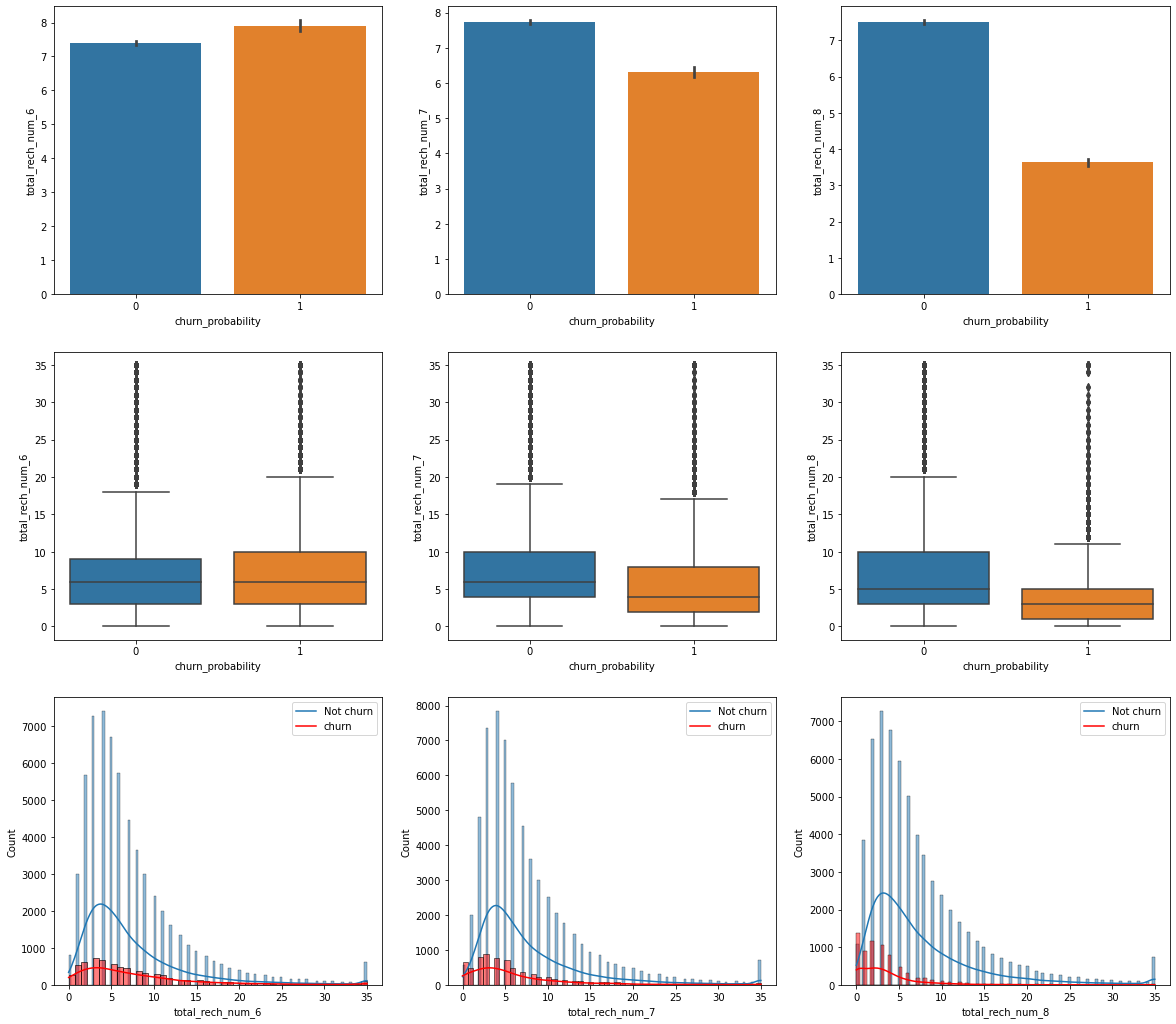

In [37]:
plot1('total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 1, 1, 1)

## Analysis

### The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase

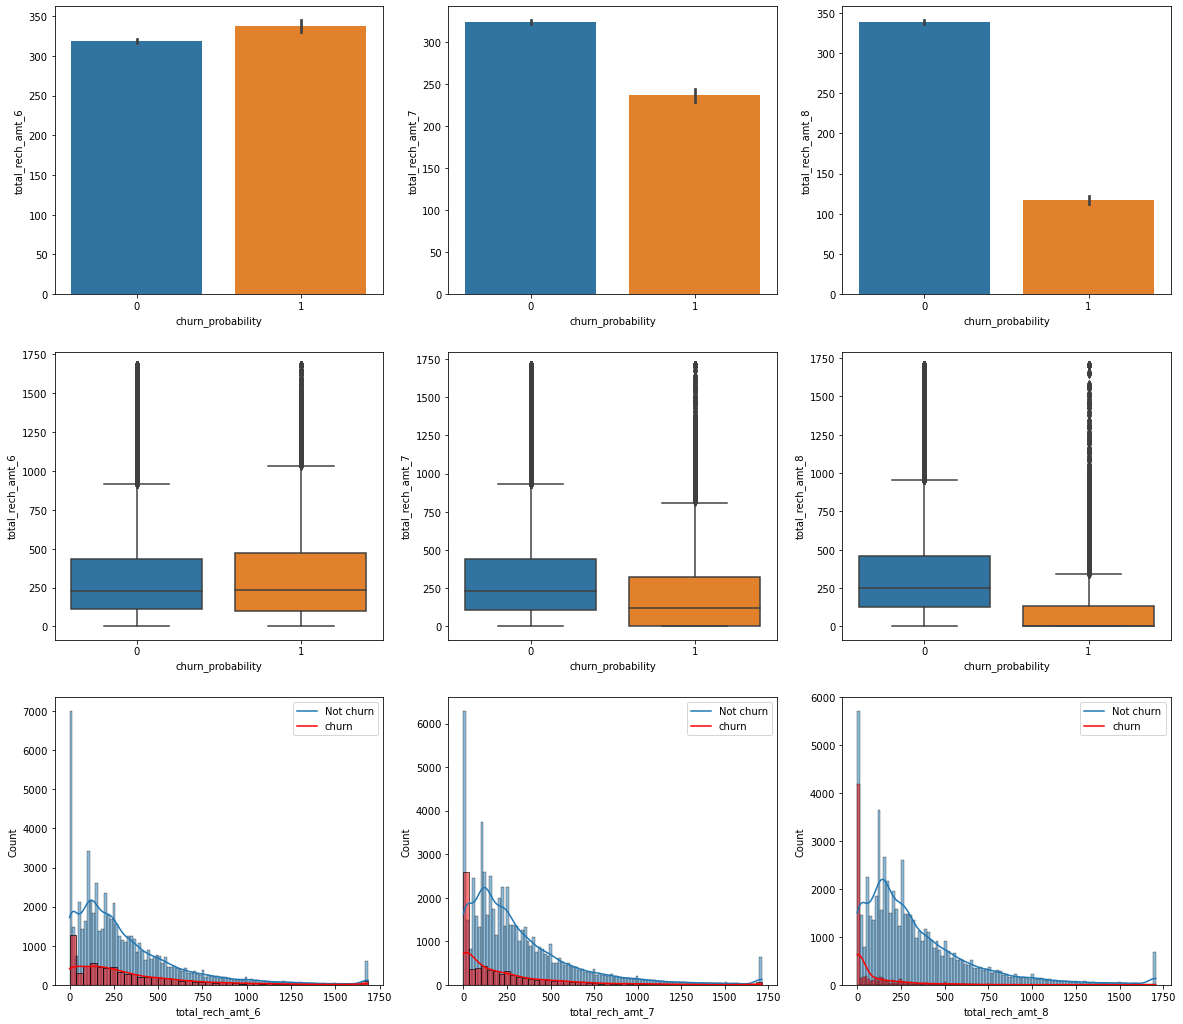

In [38]:
plot1('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 1, 1, 1)

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

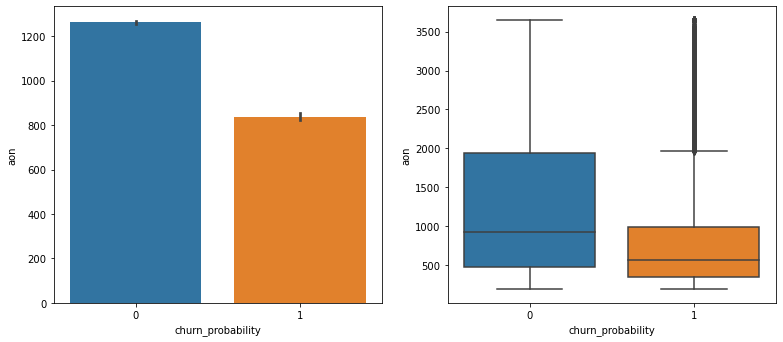

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'aon', data = df1)
plt.subplot(2,3,2)
sns.boxplot(x = 'churn_probability', y = 'aon', data = df1)

<AxesSubplot:xlabel='count_rech_3g_8', ylabel='count'>

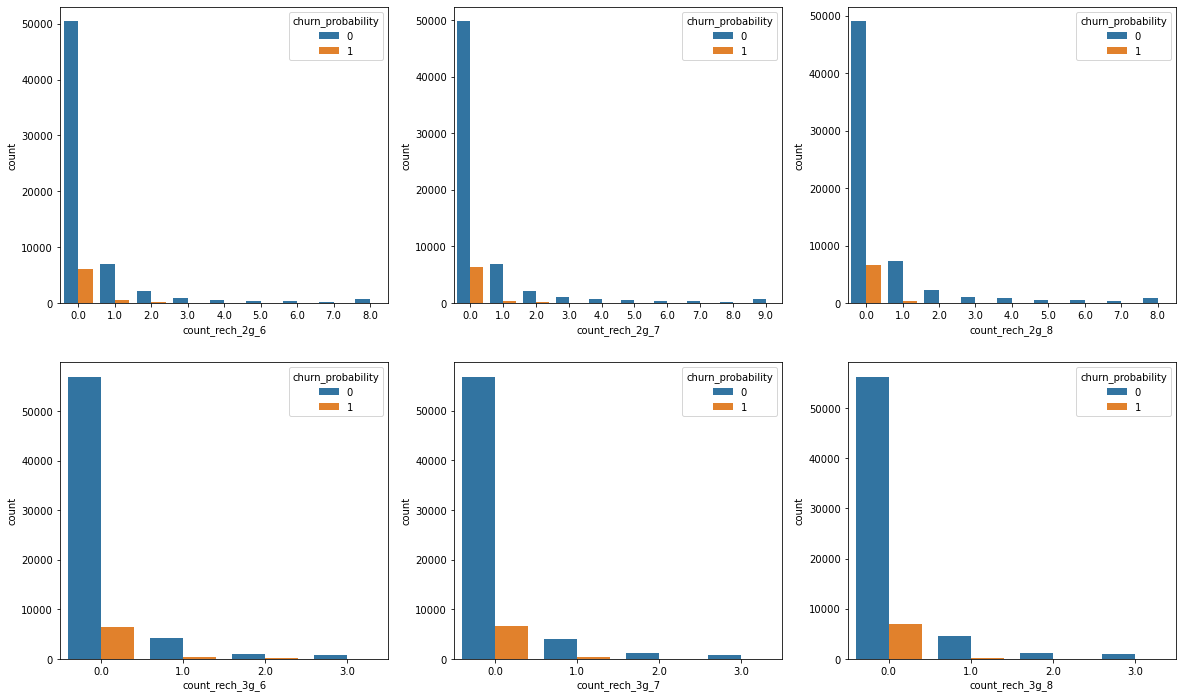

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_6', data = df1)
plt.subplot(2,3,2)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_7', data = df1)
plt.subplot(2,3,3)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_8', data = df1)
plt.subplot(2,3,4)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_6', data = df1)
plt.subplot(2,3,5)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_7', data = df1)
plt.subplot(2,3,6)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_8', data = df1)

<AxesSubplot:xlabel='churn_probability', ylabel='vol_3g_mb_8'>

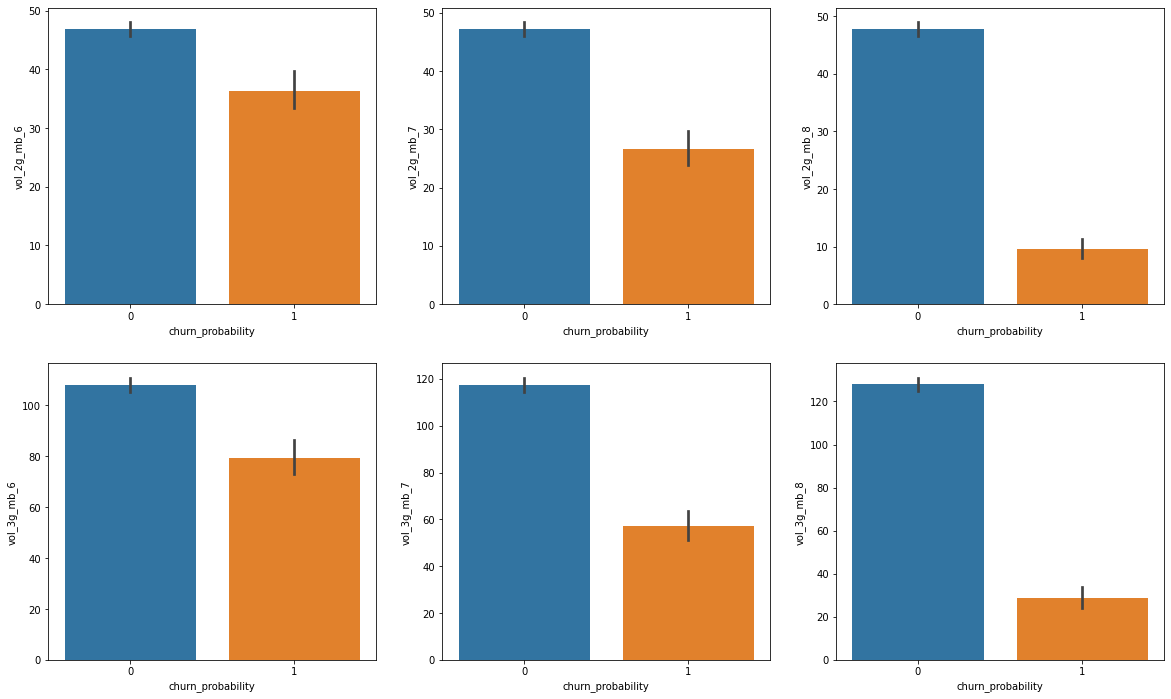

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_6', data = df1)
plt.subplot(2,3,2)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_7', data = df1)
plt.subplot(2,3,3)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_8', data = df1)
plt.subplot(2,3,4)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_6', data = df1)
plt.subplot(2,3,5)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_7', data = df1)
plt.subplot(2,3,6)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_8', data = df1)

In [42]:
df1.rename({'last_day_rch_amt_6': 'last_day_rech_amt_6', 'last_day_rch_amt_7': 'last_day_rech_amt_7', 'last_day_rch_amt_8': 'last_day_rech_amt_8'},axis = 1, inplace = True)
df_test.rename({'last_day_rch_amt_6': 'last_day_rech_amt_6', 'last_day_rch_amt_7': 'last_day_rech_amt_7', 'last_day_rch_amt_8': 'last_day_rech_amt_8'},axis = 1, inplace = True)

In [43]:
rech_df = df1.filter(regex = 'rech')
print(rech_df.columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


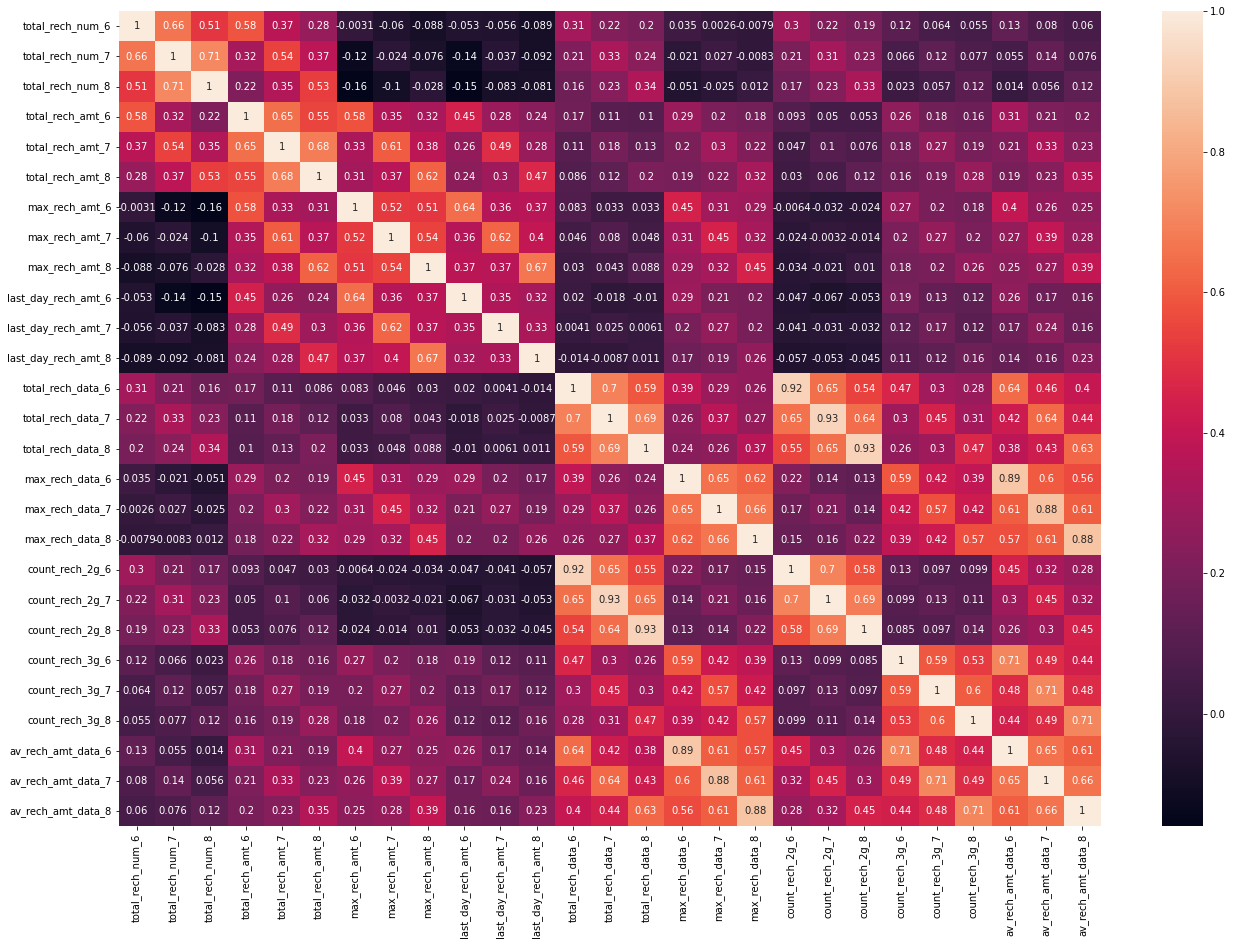

In [44]:
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True)
plt.show()

### High correlation between Average Recharge Amount and Rechage amounts for 6 and 7 This is expected as the recharge amount is calculated for purpose of filtering high value customers There is high correlation 80% between data recharge for month 7 and recharge for month 8. Any factor that has correlation with month 8 is probably correlated to the churn prediction

### count recharge have high correlation

In [45]:
total_df = df1.filter(regex = 'total')
total_df.columns

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8'],
      dtype='object')

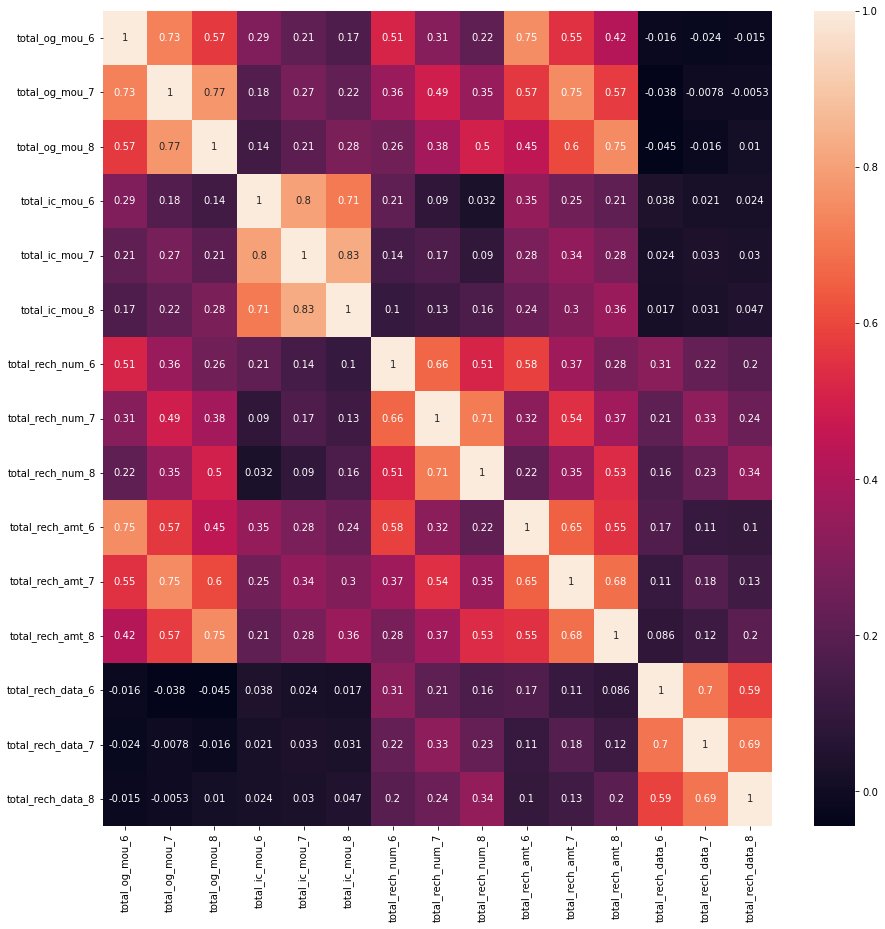

In [46]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(total_df.corr(), annot = True)
plt.show()

### total_og_mou high corr

### There is greater than 70% and some cases 82% correlation between months 7 and 8 regarding Incoming & Outgoing minutes of usage This is probabaly due to the fact that if there is heavy usage in month 7 then subsequently in month 8 there is also heavy usage - The cusotmer will not churn if there is heavy usage and vice versa

In [47]:
amt_df = df1.filter(regex='amt')
print(amt_df.columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


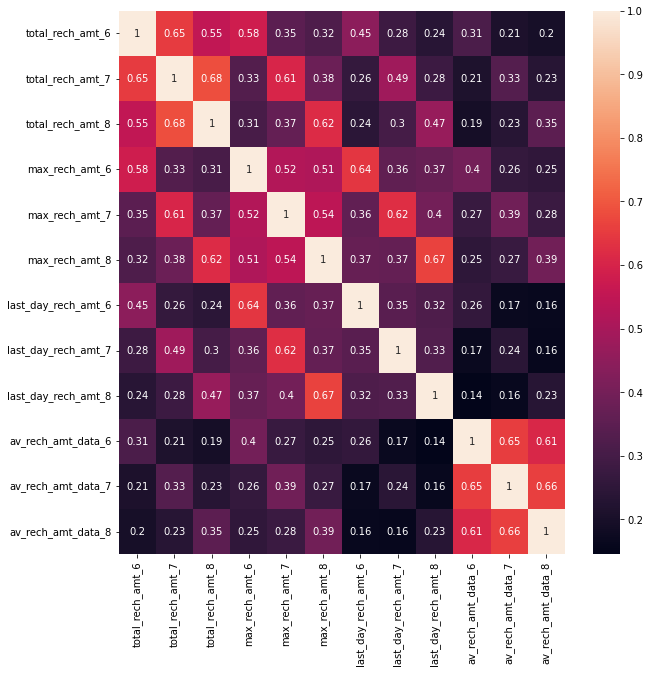

In [48]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(amt_df.corr(), annot = True)
plt.show()

### Some of this correlation is the same as the First Recharge Amount correlation There is also higher correlation between the Max Recharge Amount in month 8 (Bad Phase) and the Last Day Recharge Amount This could indicate that if a customer is not going to Churn then they Recharge for a higher amount in month 8

### last day rech amt

In [49]:
ic_mou_df = df1.filter(regex='ic.*mou')
print(ic_mou_df.columns)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')


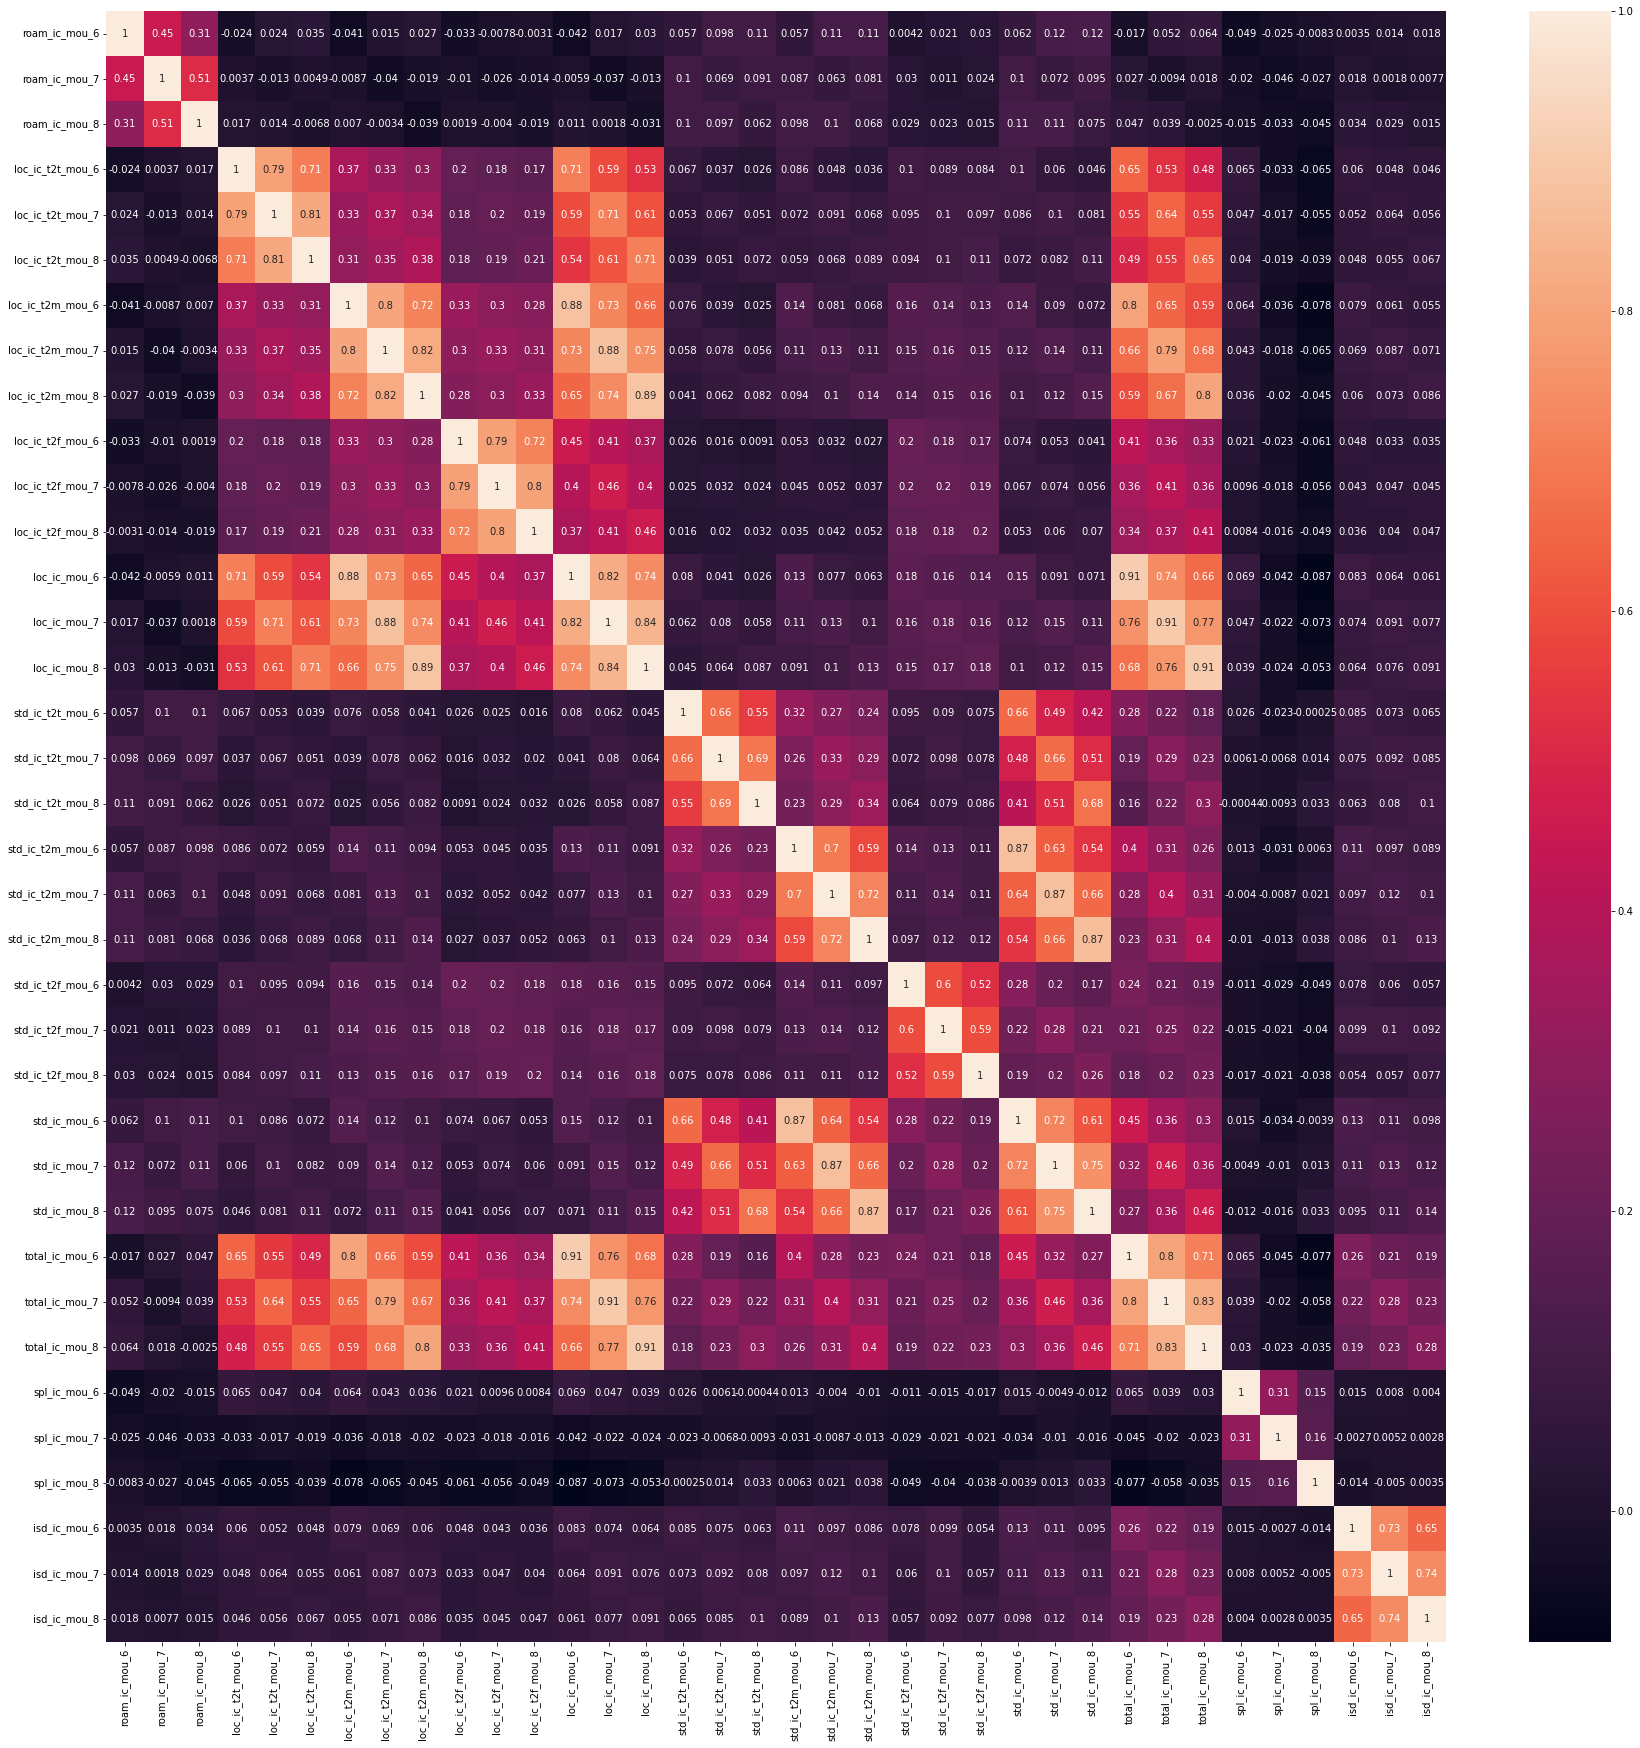

In [50]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(ic_mou_df.corr(), annot = True)
plt.show()

### local_ic_t2m_mou,local_ic_mou, std_ic_t2m_mou

### Total Incoming minutes of usage is almost entirely explained by the LOCAL call usage and not a lot by the STD calls Total Incoming minutes of usage of month 8 is also correlated to the month 7. Indicating that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8 The STD Incoming MOU is fully explained by the T2M Minutes of Usage High Correlation between Incoming T2T Usage for Months 6 and 7 and Months 7 and 8

In [51]:
og_mou_df = df1.filter(regex='og.*mou')
print(og_mou_df.columns)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


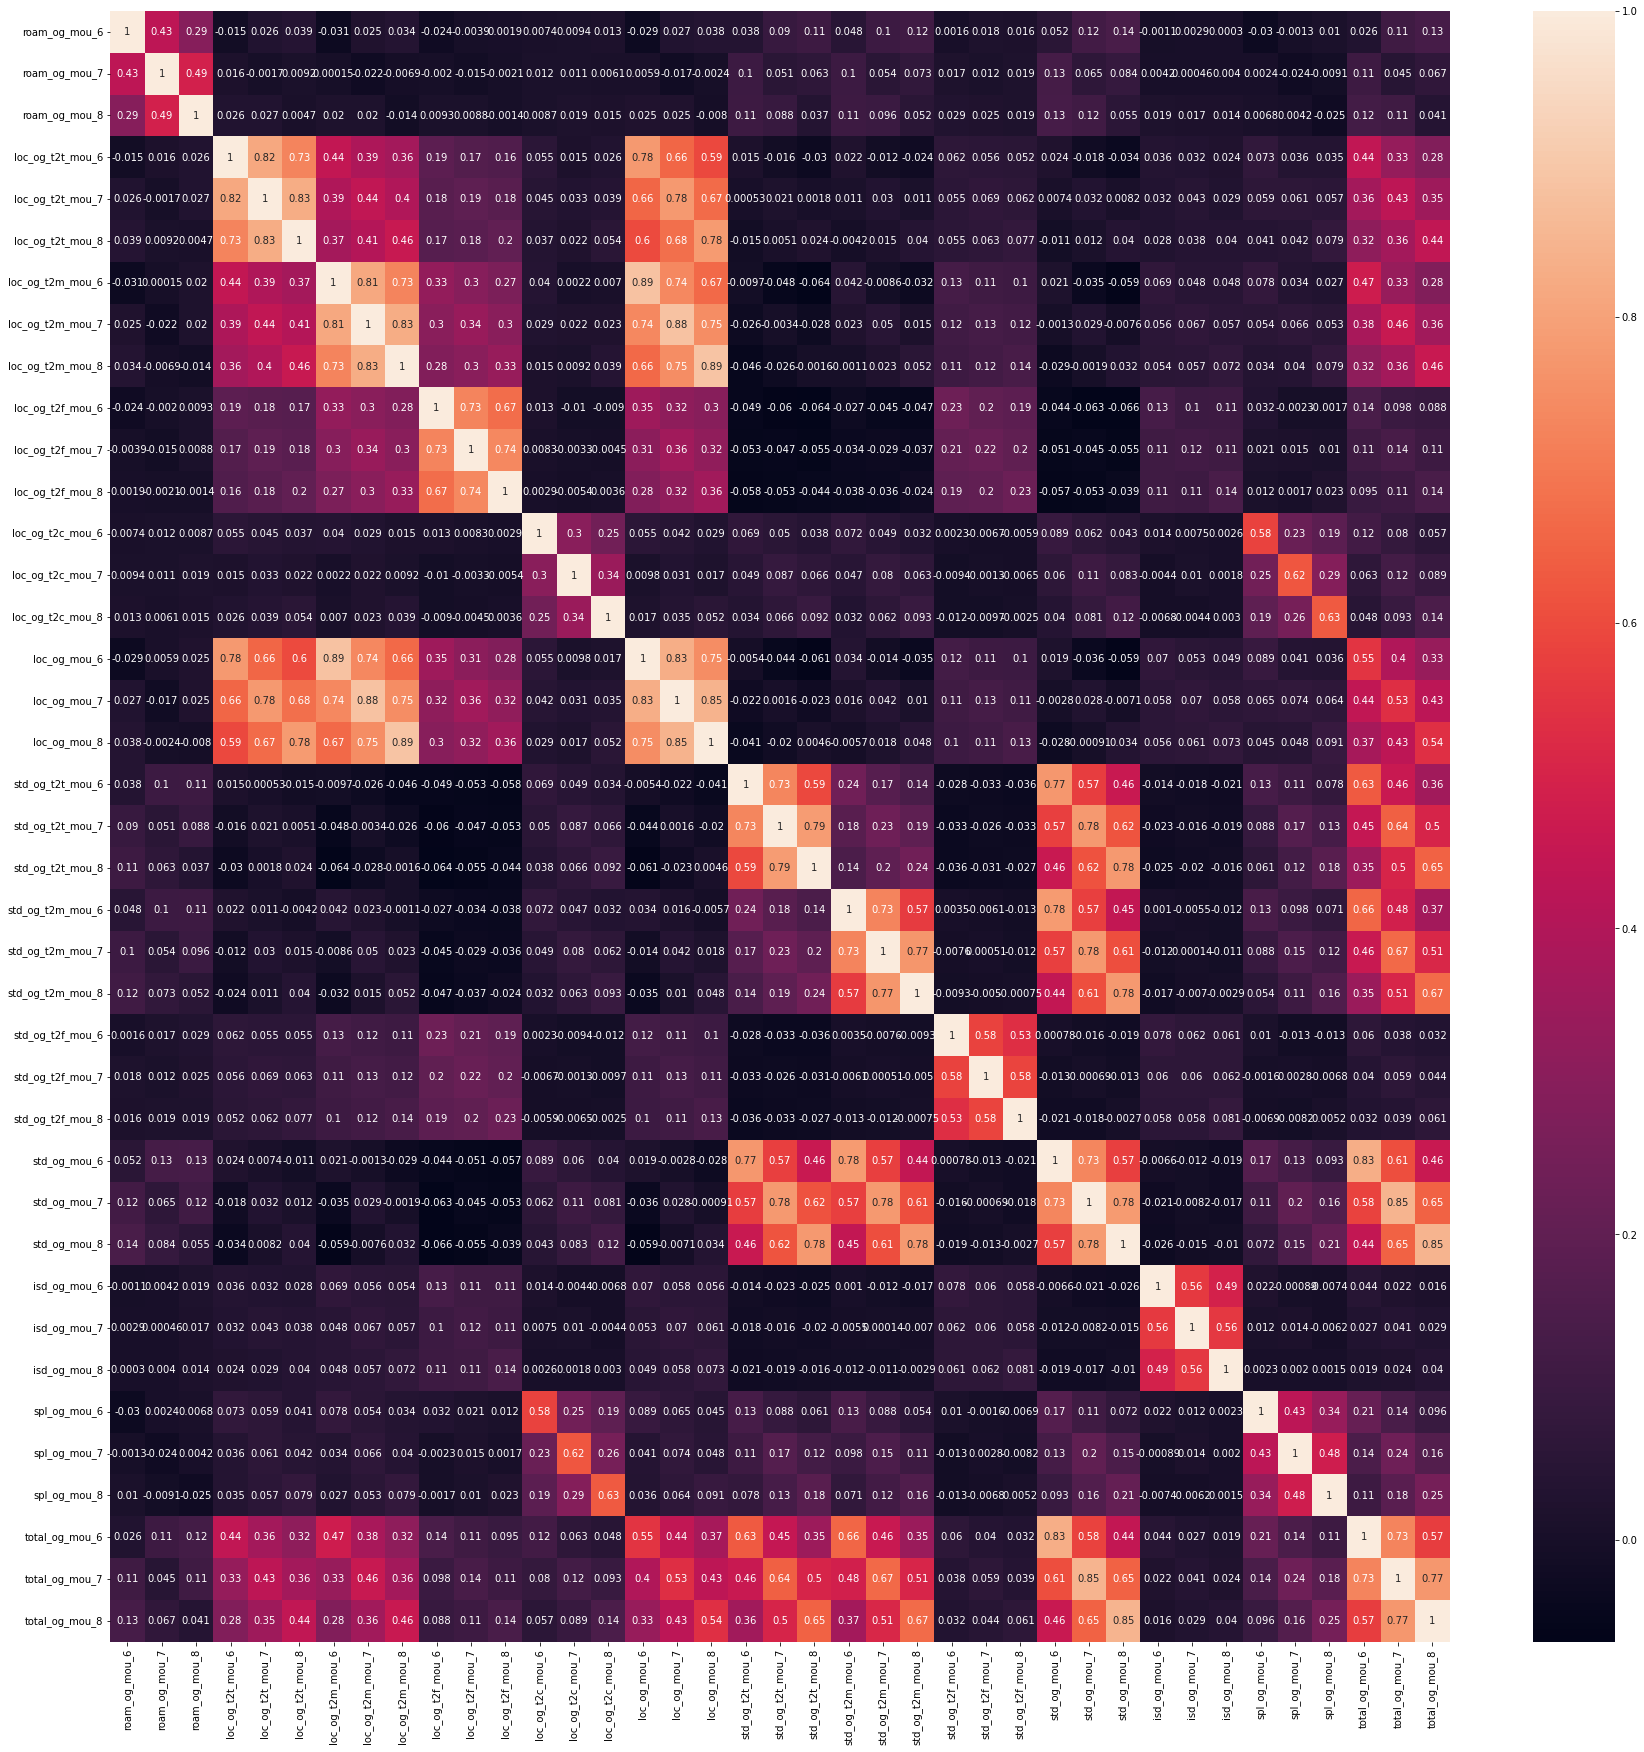

In [52]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(og_mou_df.corr(), annot = True)
plt.show()

### Total outgoing minutes of usage is almost entirely explained by the Std calls usage and not a lot by the Local calls Total Outgoing minutes of usage of month 8 is also correlated to the month 7. Indicating that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8 The STD Outgoing MOU is highly correlated to the T2T Minutes of Usage High Correlation between OutGoing T2T Usage for Months 6 and 7 and Months 7 and 8

In [53]:
g3_df = df1.filter(regex='3g')
print(g3_df.columns)

Index(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


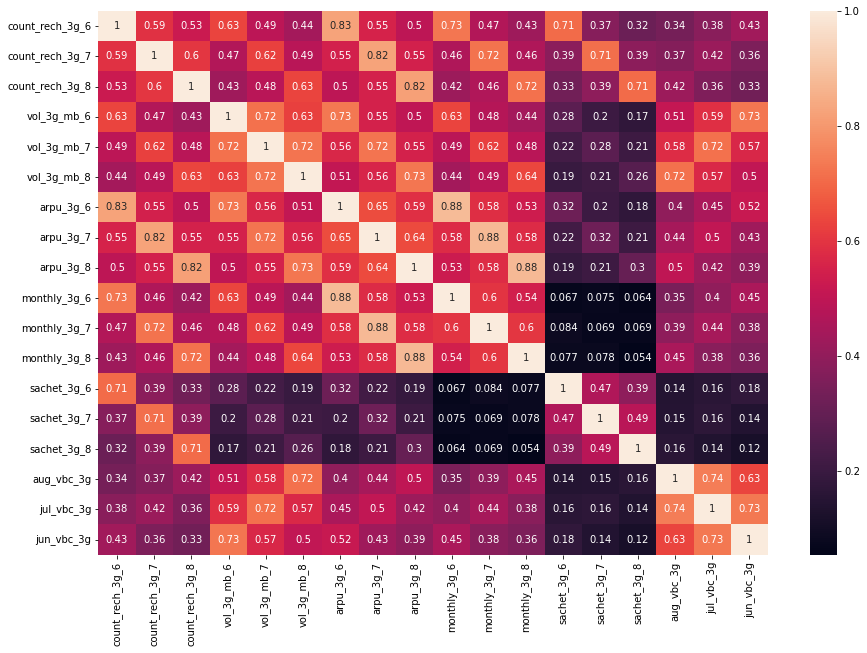

In [54]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g3_df.corr(), annot = True)
plt.show()

### count_rech_3g

In [55]:
g2_df = df1.filter(regex='2g')
print(g2_df.columns)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8'],
      dtype='object')


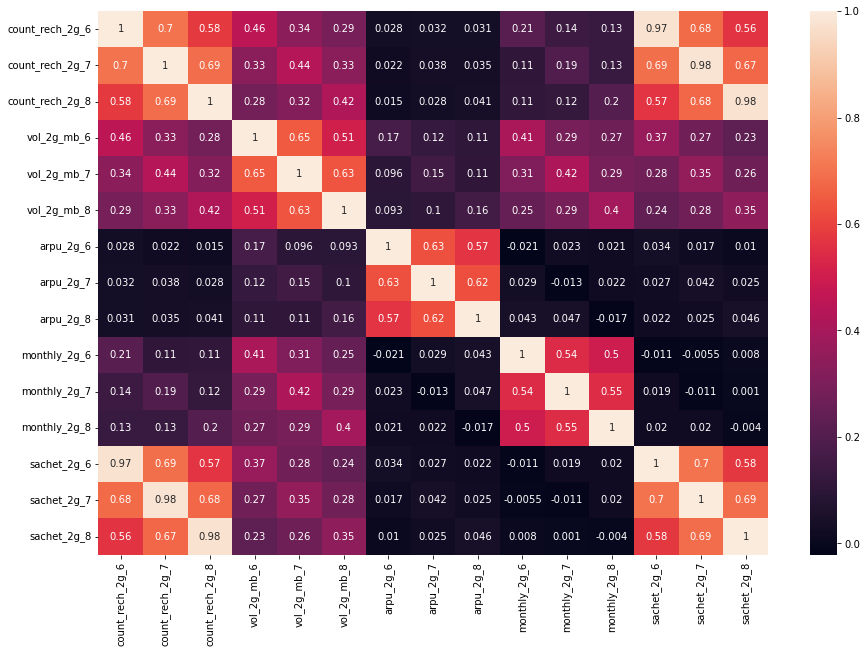

In [56]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g2_df.corr(), annot = True)
plt.show()

#### To remove High multicollinearity features:
#### count_rech...
#### local_ic_t2m_mou
#### local_ic_mou,
#### std_ic_t2m_mou
#### local_og_t2m_mou
#### local_og_mou,
#### std_og_t2m_mou
#### total_og_mou
#### last_day_rech_amt

In [57]:
to_drop = []
tempdf = df1.filter(regex='count_rech')
to_drop.extend(tempdf.columns)

In [58]:
tempdf = df1.filter(regex='t2m')
to_drop.extend(tempdf.columns)

In [59]:
tempdf = df1.filter(regex='loc_ic_mou')
to_drop.extend(tempdf.columns)

In [60]:
tempdf = df1.filter(regex='loc_og_mou')
to_drop.extend(tempdf.columns)

In [61]:
to_drop.extend(['last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8'])

In [62]:
to_drop

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8']

In [63]:
df1.drop(columns = to_drop, axis =1, inplace = True)
df_test.drop(columns = to_drop, axis =1, inplace = True)

In [64]:
df1.shape

(69999, 125)

In [65]:
df_test.shape

(30000, 124)

#### Data Preprocessing

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
X = df1.drop('churn_probability', axis = 1)
y = df1['churn_probability']

#### Train_test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

#### Scaling data

In [69]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train_sc)

PCA(random_state=42)

In [71]:
pca.components_

array([[ 1.50148948e-01,  1.62454796e-01,  1.56014978e-01, ...,
         1.36108246e-01,  1.37705121e-01,  1.31141206e-01],
       [ 1.30776672e-01,  1.46026593e-01,  1.32472904e-01, ...,
        -8.47862552e-02, -8.63748828e-02, -8.41287852e-02],
       [ 1.44079465e-03, -1.43024916e-02, -8.41162667e-03, ...,
         8.78850180e-03,  8.74498963e-03,  1.09783882e-02],
       ...,
       [-0.00000000e+00,  5.45578241e-17,  2.12447840e-16, ...,
         5.25436162e-17,  3.10704651e-17,  1.60815837e-17],
       [ 0.00000000e+00, -7.38743645e-18,  3.17501371e-17, ...,
        -8.69043905e-18, -1.33980245e-17, -1.45974095e-17],
       [ 0.00000000e+00,  2.67459646e-17,  1.27594312e-16, ...,
         4.98908376e-17,  1.29224023e-18, -8.21765807e-18]])

In [72]:
pca.explained_variance_ratio_

array([1.50526638e-01, 1.10227360e-01, 6.04807524e-02, 4.69125606e-02,
       3.49289426e-02, 2.99135781e-02, 2.79695552e-02, 2.73396165e-02,
       2.59729363e-02, 2.45341045e-02, 2.23952666e-02, 2.00764748e-02,
       1.84887714e-02, 1.70887037e-02, 1.63992710e-02, 1.58670874e-02,
       1.43486505e-02, 1.39137617e-02, 1.27408452e-02, 1.24406840e-02,
       1.13145338e-02, 1.06977311e-02, 1.05848746e-02, 9.61984240e-03,
       9.46048690e-03, 9.37021334e-03, 9.00113723e-03, 7.91250558e-03,
       7.68368720e-03, 7.52001697e-03, 7.19119150e-03, 6.95767793e-03,
       6.84453045e-03, 6.78881058e-03, 6.60153074e-03, 6.14463265e-03,
       6.06332475e-03, 5.99617738e-03, 5.59635963e-03, 5.47940448e-03,
       5.41235385e-03, 5.15837683e-03, 4.80518255e-03, 4.78365268e-03,
       4.54005863e-03, 4.29347831e-03, 4.20330806e-03, 3.95289066e-03,
       3.80171620e-03, 3.72323866e-03, 3.71227193e-03, 3.66088357e-03,
       3.55403558e-03, 3.43980525e-03, 3.36896516e-03, 3.25767964e-03,
      

In [73]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

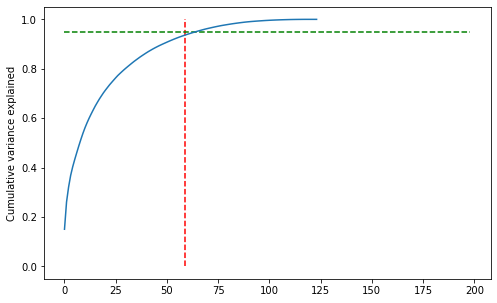

In [74]:
fig = plt.figure(figsize=[8,5])
plt.vlines(x=59, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=198, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [75]:
# Calculating the Principle components for variance cover of 95%
pca_ag = PCA(0.95)

In [76]:
#Applying PCA components to train data set

df_train_pca = pca_ag.fit_transform(X_train_sc)

df_train_pca.shape

(55999, 66)

In [77]:
# Applying the PCA components to Test Data Set

df_test_pca = pca_ag.transform(X_test_sc)

df_test_pca.shape

(14000, 66)

In [78]:
corrmat = np.corrcoef(df_train_pca.transpose())

corrmat.shape

(66, 66)

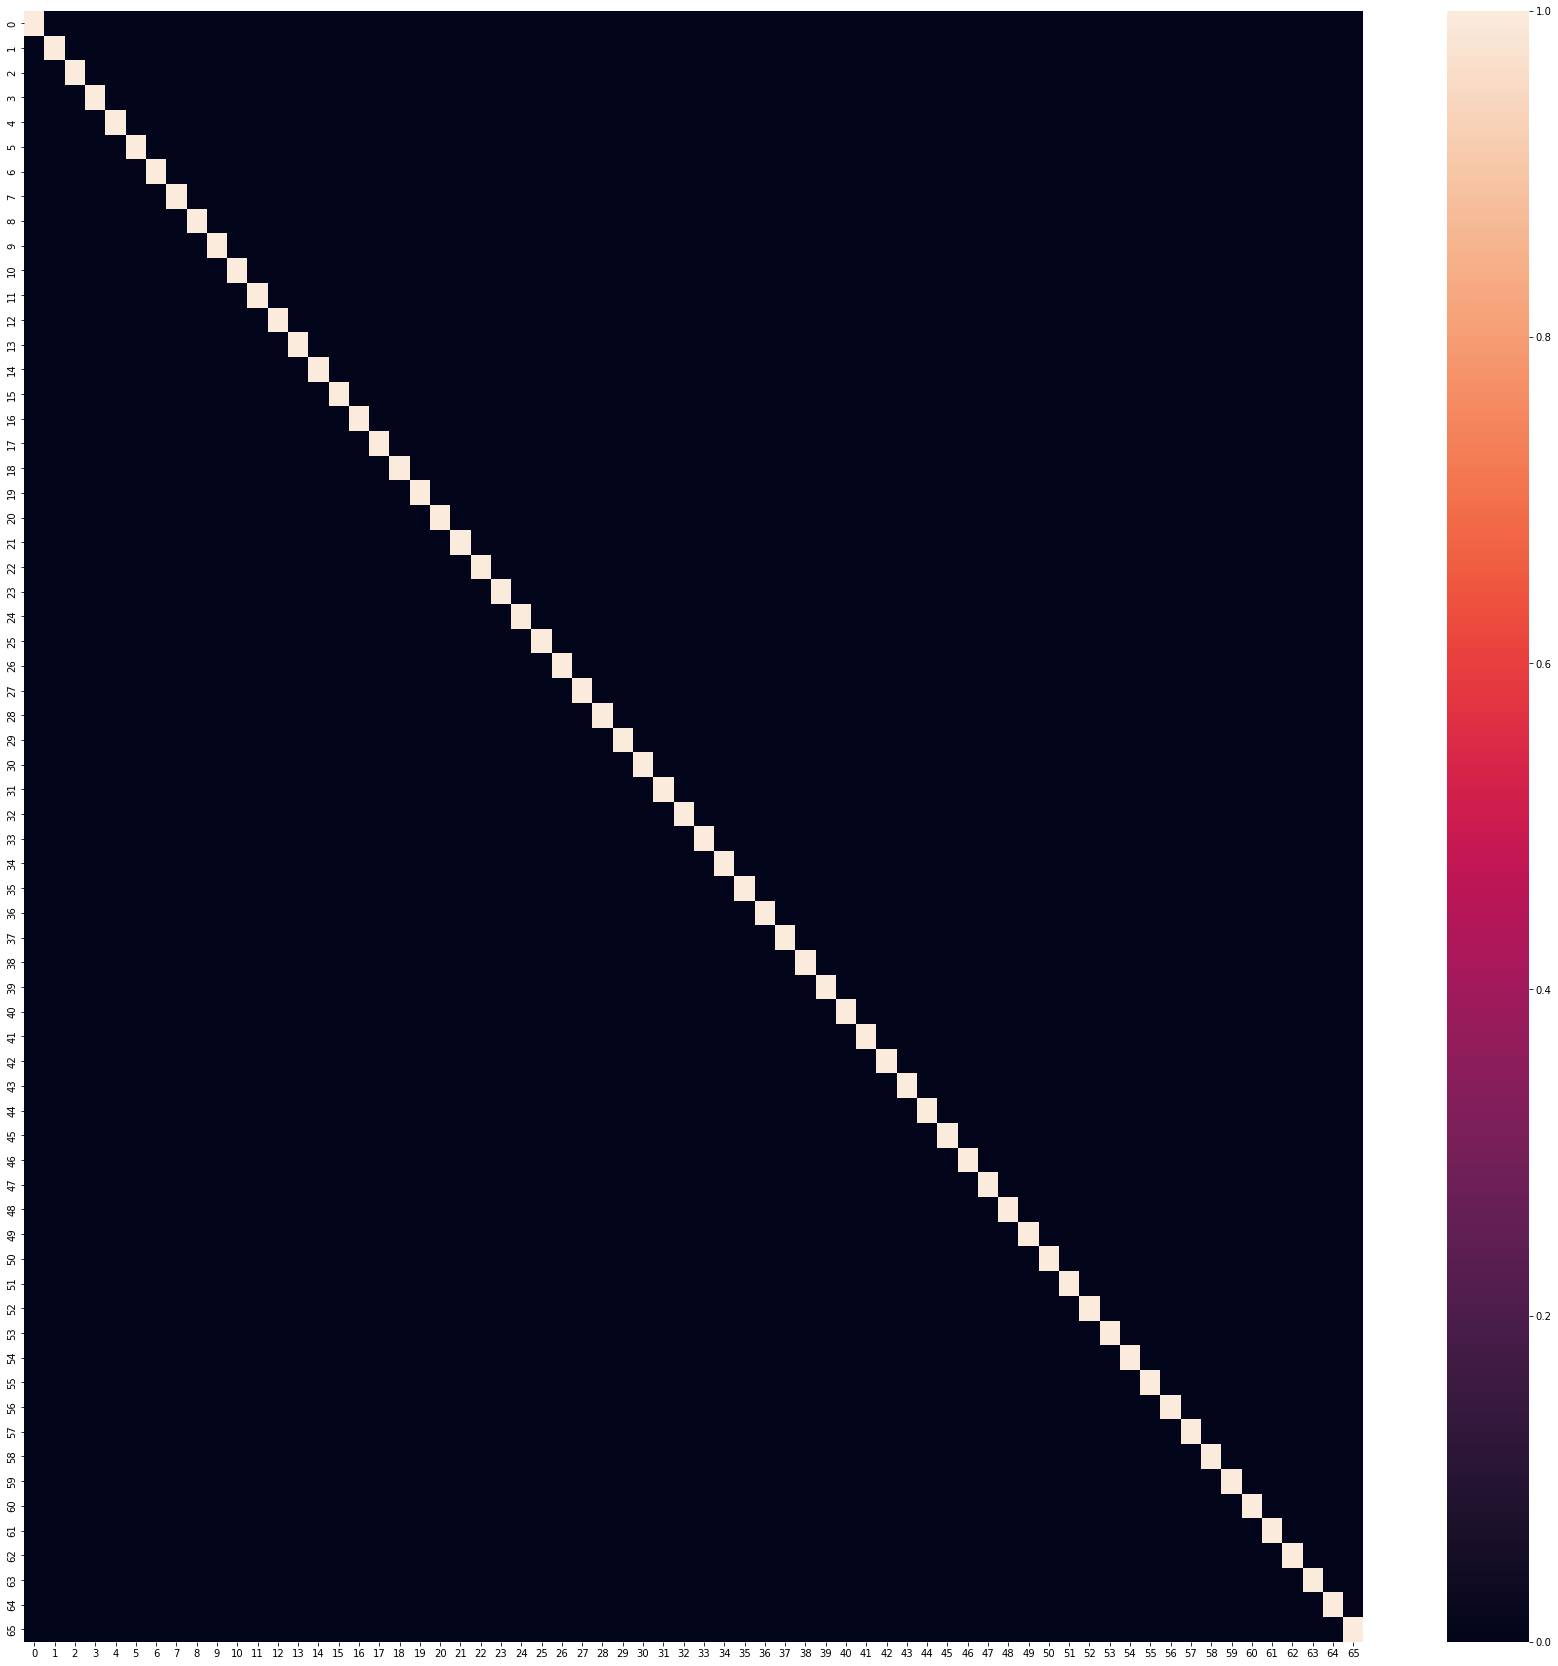

In [79]:
plt.figure(figsize = (30, 30))
sns.heatmap(corrmat)
plt.show()

### As seen above all correlation is handled after PCA

### Calculating using 2 Principle components for Visualizing

In [80]:
pca_ag_2 = PCA(n_components = 2)

In [81]:
df_pca = pca_ag_2.fit_transform(X_train_sc)

df_pca.shape

(55999, 2)

In [82]:
tele_df = pd.DataFrame(data = df_pca ,columns = ['PC_1' , 'PC_2'])

In [83]:
tele_df.tail()

,PC_1,PC_2
55994,-3.302858,-1.008094
55995,2.593958,4.808099
55996,-2.812486,-0.846522
55997,6.793553,-5.924420
55998,7.558575,3.269251


In [84]:
print('Explained variation per principal component: {}'.format(pca_ag_2.explained_variance_ratio_))

Explained variation per principal component: [0.15052664 0.11022736]


In [85]:
finalDf=pd.concat([tele_df ,df1['churn_probability'].reset_index(drop = True)],axis=1)
finalDf.head()

,PC_1,PC_2,churn_probability
0,-4.043341,-1.795105,0
1,-0.857220,1.907353,0
2,6.426325,-3.922075,0
3,-2.774608,-0.556816,0
4,-1.461276,1.330076,0


<AxesSubplot:title={'center':'2 PCA Components'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

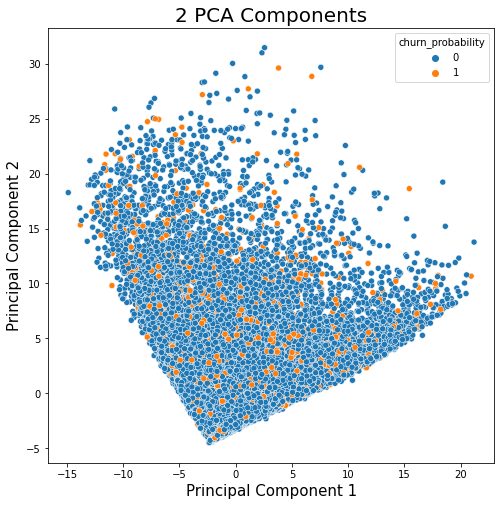

In [86]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)
sns.scatterplot( finalDf['PC_2'],finalDf['PC_1'], hue = finalDf['churn_probability'])

### Tuning and Modelling 

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.feature_selection import RFE

In [88]:
fold = StratifiedKFold(n_splits = 3)

#### Logistic regression

In [89]:
grid = [
    {    "penalty":['l1','l2'],
        "class_weight":[{0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
    }    
]

gscv = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, cv = fold , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [90]:
gfit = gscv.fit(df_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


#### Fitting 3 folds for each of 6 candidates, totalling 18 fits

In [91]:
print("score : {}".format(gfit.best_score_))
logistic_params = gfit.best_params_
print(logistic_params)

score : 0.914712782763157
{'class_weight': {0: 1, 1: 2}, 'penalty': 'l2'}


In [92]:
lr_best = gfit.best_estimator_

In [93]:
print(lr_best.coef_.shape)
lr_best.coef_

(1, 66)


array([[-2.90853538e-01, -1.64966924e-01, -3.44334708e-01,
        -4.31804309e-01,  1.76169111e-01,  1.58614389e-01,
         2.28202781e-01,  3.68150658e-01,  5.38282639e-01,
         3.24468032e-02, -6.27903187e-02,  6.01630244e-02,
         2.01335973e-02,  6.62451707e-02,  2.14363479e-02,
         3.77785711e-01,  4.24550523e-03,  1.10046992e-01,
         2.58714033e-01, -1.97057009e-01,  6.26793220e-02,
         1.01879107e-01, -1.49133227e-01,  4.03590182e-04,
         2.98206931e-01,  3.40660417e-01, -1.25639912e-02,
         2.75478170e-01,  9.22441095e-02,  4.09063145e-02,
        -2.87456075e-01, -6.38755508e-01,  1.24733202e-01,
        -4.15119252e-01,  1.36145869e-02,  2.63488572e-01,
        -6.97628026e-02,  1.91703501e-02, -4.09661147e-02,
         3.19915171e-01, -4.40985545e-02, -1.03946690e-01,
        -1.62787557e-02, -7.92476409e-02, -1.88827294e-01,
         1.26536888e-01, -1.63341879e-01,  3.34371611e-01,
         1.08691360e-01,  3.59456783e-01, -3.51219644e-0

In [94]:
y_pred = lr_best.predict(df_test_pca)

In [95]:
print(confusion_matrix(y_test, y_pred))

[[12066   542]
 [  615   777]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12608
           1       0.59      0.56      0.57      1392

    accuracy                           0.92     14000
   macro avg       0.77      0.76      0.76     14000
weighted avg       0.92      0.92      0.92     14000



## Random Forest

In [97]:
grid2 = [
    {   'n_estimators' : [250],
        'max_depth' : [ 7], 
        'max_features' : [ 15],
        'min_samples_split':[3, 4],
        'min_samples_leaf':[1,2],
        "class_weight":['balanced', {0:1,1:10}]
    }    
]

gscv2 = HalvingGridSearchCV(RandomForestClassifier(random_state = 100), grid2, cv = fold , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [98]:
gfit2 = gscv2.fit(df_train_pca, y_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 18666
max_resources_: 55999
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 18666
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 1
n_candidates: 3
n_resources: 55998
Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [106]:
print("score : {}".format(gfit2.best_score_))
gfit2.best_params_

score : 0.8605435546772954


{'class_weight': 'balanced',
 'max_depth': 7,
 'max_features': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 250}

In [107]:
rf_best = gfit2.best_estimator_

In [108]:
rf_best.feature_importances_

array([0.085638  , 0.01514153, 0.08424579, 0.10474919, 0.03823899,
       0.01357301, 0.03063664, 0.18269462, 0.11447849, 0.0081074 ,
       0.0037184 , 0.00839719, 0.00802757, 0.01583012, 0.00512163,
       0.05409964, 0.00537756, 0.00633804, 0.00667723, 0.0033419 ,
       0.00307062, 0.00210892, 0.01197833, 0.00298074, 0.01242149,
       0.00973648, 0.00908595, 0.00619228, 0.01366525, 0.00449459,
       0.00301031, 0.02030137, 0.00510943, 0.00472187, 0.00662932,
       0.00872391, 0.00231153, 0.00194012, 0.00286636, 0.00532037,
       0.00108418, 0.00223926, 0.00282211, 0.00554964, 0.00152776,
       0.00234106, 0.00248044, 0.00878095, 0.00212772, 0.00273562,
       0.00167775, 0.00178963, 0.00238994, 0.00278183, 0.00545401,
       0.00113379, 0.00160421, 0.00124268, 0.00310286, 0.00425469,
       0.00239172, 0.00234326, 0.00266997, 0.00137206, 0.00125205,
       0.00174862])

In [109]:
y_pred2 = rf_best.predict(df_test_pca)

In [110]:
print(confusion_matrix(y_test, y_pred2))

[[10952  1656]
 [  328  1064]]


In [111]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     12608
           1       0.39      0.76      0.52      1392

    accuracy                           0.86     14000
   macro avg       0.68      0.82      0.72     14000
weighted avg       0.91      0.86      0.88     14000



### XGBClassifier

In [112]:
grid3 = [
    { 
        'n_estimators': [1200],
        'learning_rate': [0.01],
        'max_depth': [4,5],
        'min_child_weight': [2],
        "class_weight":[{0:1,1:10}, 'balanced' ]
    }    
]

gscv3 = RandomizedSearchCV(XGBClassifier(random_state = 100, tree_method='gpu_hist', predictor='gpu_predictor'), grid3, cv = fold , scoring = 'accuracy', n_jobs = -1, n_iter=20)

In [114]:
gfit3 = gscv3.fit(df_train_pca, y_train)

[21:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [115]:
print("score : {}".format(gfit3.best_score_))
xgbparams = gfit3.best_params_
print(xgbparams)

score : 0.9202842802169199
{'n_estimators': 1200, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.01, 'class_weight': {0: 1, 1: 10}}


In [116]:
xgb_best = gfit3.best_estimator_

In [117]:
xgb_best.feature_importances_

array([0.05604494, 0.02831103, 0.0593601 , 0.04162747, 0.02451997,
       0.01214747, 0.02332405, 0.07058951, 0.04676686, 0.00978323,
       0.00825864, 0.01034192, 0.00739297, 0.01077596, 0.01464458,
       0.027296  , 0.01137492, 0.00846495, 0.01433871, 0.00883294,
       0.00903777, 0.00718367, 0.01643334, 0.0096533 , 0.02018443,
       0.0159131 , 0.01475549, 0.01129647, 0.01692022, 0.0112269 ,
       0.01111683, 0.02052083, 0.0114739 , 0.01321546, 0.01199916,
       0.01881042, 0.00790123, 0.00947493, 0.00943801, 0.01398565,
       0.00702636, 0.00947319, 0.00897709, 0.01290299, 0.0100009 ,
       0.00763067, 0.00794193, 0.01603926, 0.00936587, 0.01103948,
       0.00801451, 0.00835655, 0.00874677, 0.00875656, 0.00998606,
       0.00716383, 0.0080556 , 0.00770738, 0.01012819, 0.01133149,
       0.01099957, 0.00797154, 0.00896729, 0.00919647, 0.00963642,
       0.0098467 ], dtype=float32)

In [118]:
y_pred3 = xgb_best.predict(df_test_pca)

In [119]:
print(confusion_matrix(y_test, y_pred3))

[[12344   264]
 [  789   603]]


In [120]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12608
           1       0.70      0.43      0.53      1392

    accuracy                           0.92     14000
   macro avg       0.82      0.71      0.75     14000
weighted avg       0.92      0.92      0.92     14000



## Without using PCA for finding important features

### RFE + Logistic Regression

In [121]:
# Selecting top 60 features using RFE
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 60)

In [122]:
rfe_fit = rfe.fit(X_train_sc, y_train)

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 58),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 36),
 ('offnet_mou_6', False, 54),
 ('offnet_mou_7', False, 43),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 38),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 57),
 ('roam_og_mou_6', False, 9),
 ('roam_og_mou_7', False, 42),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 45),
 ('loc_og_t2t_mou_7', False, 20),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 15),
 ('loc_og_t2f_mou_7', False, 50),
 ('loc_og_t2f_mou_8', False, 48),
 ('loc_og_t2c_mou_6', False, 37),
 ('loc_og_t2c_mou_7', False, 55),
 ('loc_og_t2c_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 14),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 4),
 ('std_og_t2f_mou_7', False, 51),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 19),
 ('std_og_mou_8', True,

In [124]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_train_sc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.956216,0.687844,-0.991586,-0.508198,-0.260900,-0.493094,-0.697066,-0.188431,-0.683250,-0.248433,...,-0.194467,-0.193824,-0.196245,-0.547093,-0.550646,-0.551913,-0.463611,-0.300594,-0.290242,-0.282305
1,-0.441984,-0.349220,-0.710710,0.664072,0.225604,0.303422,0.383886,-0.138089,-0.153620,-0.248433,...,-0.194467,-0.193824,-0.196245,-0.547093,-0.550646,-0.551913,0.108838,-0.300594,-0.222196,-0.282305
2,0.121899,0.728808,0.513644,-0.374334,-0.339777,-0.457452,-0.232946,0.124255,-0.542051,-0.248433,...,-0.194467,-0.193824,-0.196245,1.827842,1.816047,1.811879,0.341395,-0.300594,-0.290242,-0.282305
3,-0.455933,-0.785935,-0.021523,-0.281184,-0.443905,-0.284479,-0.262117,-0.533277,0.233512,-0.248433,...,-0.194467,-0.193824,-0.196245,-0.547093,-0.550646,-0.551913,-0.380480,-0.300594,-0.290242,-0.282305
4,-0.180267,-0.183825,-0.333031,-0.459697,-0.442753,-0.412345,-0.153389,-0.104427,-0.289429,0.711869,...,-0.194467,-0.193824,-0.196245,-0.547093,-0.550646,-0.551913,-0.154236,-0.300594,-0.290242,-0.282305


In [125]:
col = X_train_sc_df.columns[rfe.support_]

### Hyper parameter tuning for Logistic regression

In [126]:
grid = [
    {    "penalty":['l1','l2'],
        "class_weight":[{0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
    }    
]

gscv = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, cv = fold , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [127]:
gfit = gscv.fit(X_train_sc_df[col], y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [128]:
print("score : {}".format(gfit.best_score_))
logistic_params = gfit.best_params_
print(logistic_params)

score : 0.9165520863360775
{'class_weight': {0: 1, 1: 2}, 'penalty': 'l2'}


In [129]:
lr_best_2 = gfit.best_estimator_

In [130]:
print(lr_best_2.coef_.shape)
lr_best_2.coef_

(1, 60)


array([[ 0.51447572,  0.36540859,  0.33090954,  0.2132501 , -0.75783597,
         0.07297156,  0.24267795, -0.30445935,  0.08468477, -0.25509347,
        -0.60550682, -0.12116043,  0.20964874,  1.25342567,  0.06495465,
         0.07089629, -0.11354974, -0.22988231,  0.20007443, -0.81575029,
        -0.10972064,  0.08571427, -0.44922963,  0.07929539, -0.18372829,
        -0.06351581,  0.23052392,  0.16454761,  0.14895639, -1.89926469,
        -0.08825444, -0.07044313, -0.82281032,  0.26837093, -0.73926135,
        -0.28024007, -0.15932822, -0.01921431, -0.23911661, -0.48438779,
         0.09152917, -0.07207707, -0.16606374,  0.11022962,  0.14694061,
        -0.13050376, -0.2400757 , -0.1134679 , -0.10883895,  0.2190455 ,
         0.18071957,  0.05638518, -0.06937157, -0.08056698,  0.11648801,
        -0.17791318, -0.24632339, -0.38371712, -0.17687819,  0.09728071]])

### Top 10 features using Logistic regression

In [131]:
LR_result = pd.DataFrame(lr_best_2.coef_.reshape(60,1), index = col, columns = ['Coef'])
LR_result.sort_values(by = 'Coef', key = abs, ascending = False).head(10)

,Coef
total_ic_mou_8,-1.899265
std_og_mou_8,1.253426
spl_ic_mou_8,-0.822810
total_og_mou_8,-0.815750
offnet_mou_8,-0.757836
total_rech_num_8,-0.739261
std_og_t2t_mou_8,-0.605507
arpu_6,0.514476
max_rech_amt_8,-0.484388
loc_ic_t2f_mou_8,-0.449230


### RFE + RandomForest

In [132]:
grid2 = [
    {   'n_estimators' : [250],
        'max_depth' : [ 7], 
        'max_features' : [20],
        'min_samples_split':[ 4],
    }    
]

gscv2 = RandomizedSearchCV(RandomForestClassifier(random_state = 100, class_weight = 'balanced'), grid2, cv = fold , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [133]:
gfit2 = gscv2.fit(X_train_sc_df[col], y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [134]:
print("score : {}".format(gfit2.best_score_))
gfit2.best_params_

score : 0.914337716754086


{'n_estimators': 250,
 'min_samples_split': 4,
 'max_features': 20,
 'max_depth': 7}

In [135]:
rf_best_2 = gfit2.best_estimator_

## Top 25 featuers

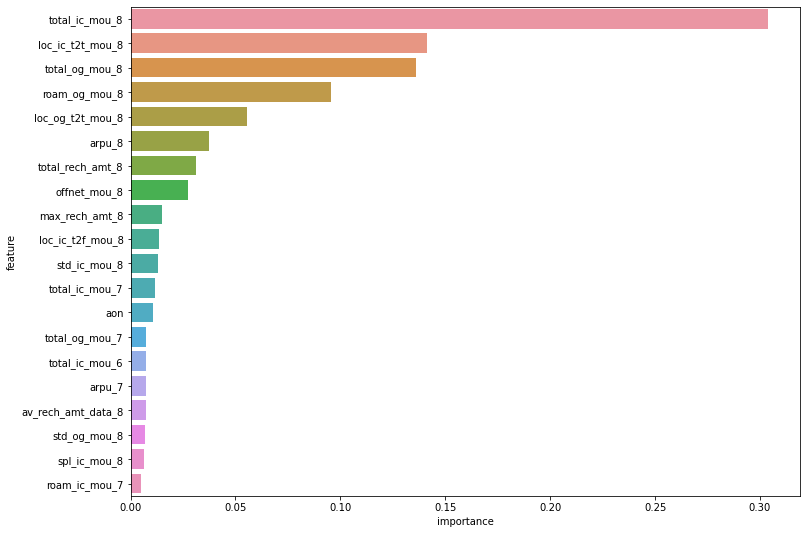

In [136]:
rf_df = pd.DataFrame({'feature' : X_train_sc_df[col].columns, 'importance' : rf_best_2.feature_importances_})
rf_df = rf_df.sort_values(by = 'importance', ascending = False).head(20)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = rf_df, y = 'feature', x = 'importance')
plt.show()

### Prediction on given test data

In [137]:
df_test_sc = sc.transform(df_test)

In [138]:
df_test_sc_pca = pca_ag.transform(df_test_sc)

In [139]:
y_pred_final = xgb_best.predict(df_test_sc_pca)

In [141]:
sample = pd.read_csv('Desktop/Python Data Structure/solution.csv')
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [142]:
sample['churn_probability'] = y_pred_final

In [143]:
sample['churn_probability'].value_counts()

0    27990
1     2010
Name: churn_probability, dtype: int64

In [144]:
submission = sample.to_csv('submissions.csv', index=False)

In [145]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
